## Imports

In [48]:
import pandas as pd
import numpy as np

import pickle

%pylab inline
%config InlineBackend.figure_formats = ['retina']

import seaborn as sns
sns.set()

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve 
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.feature_selection import RFE


import featuretools as ft
import featuretools.variable_types as vtypes

import datetime

from bokeh.models import HoverTool
from bokeh.models.sources import ColumnDataSource
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.layouts import gridplot


Populating the interactive namespace from numpy and matplotlib


/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['grid', 'figure', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Loading X and y from Pickle Files

In [2]:
with open('X.pickle','rb') as read_file:
    X = pickle.load(read_file)

In [3]:
with open('y.pickle','rb') as read_file:
    y = pickle.load(read_file)

In [4]:
X.head()

,Location,IS_WEEKEND(timestamp),IS_WEEKEND(Last_Known),WEEKDAY(timestamp),WEEKDAY(Last_Known),DAY(timestamp),DAY(Last_Known),MONTH(timestamp),MONTH(Last_Known),YEAR(timestamp),...,locations.CUM_SUM(MAX(traffic.Vehicles)),locations.CUM_SUM(MEAN(traffic.Obs_Speed)),locations.CUM_SUM(MEAN(traffic.Av_Obs_Time)),locations.CUM_SUM(MEAN(traffic.Med_Obs_Time)),locations.CUM_SUM(MEAN(traffic.Vehicles)),locations.CUM_SUM(SUM(traffic.Obs_Speed)),locations.CUM_SUM(SUM(traffic.Av_Obs_Time)),locations.CUM_SUM(SUM(traffic.Med_Obs_Time)),locations.CUM_SUM(SUM(traffic.Vehicles)),locations.CUM_SUM(MINUTE(first_traffic_time))
Index,,,,,,,,,,,,,,,,,,,,,
3796,158655,False,False,3,3,13,13,2,2,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
2720,201291,False,False,3,3,13,13,2,2,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
3894,192734,False,False,3,3,13,13,2,2,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90
904,187589,False,False,3,3,13,13,2,2,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130
3609,158684,False,False,3,3,13,13,2,2,2014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155


In [5]:
y.head()

Index
3796    0
2720    0
3894    1
904     1
3609    0
Name: Is_Congested_x, dtype: int64

## Create a Holdout Test Set

In [6]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.2, random_state=13)

## K-Nearest Neighbors

### First attempt 10-fold, K=5

In [10]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.63814617 0.6399287  0.63636364 0.60784314 0.62745098 0.64221825
 0.64937388 0.62969589 0.64042934 0.6118068 ]


In [11]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.6323256770589192


In [14]:
# search for an optimal value of K for KNN
k_range = list(range(1, 70))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.5805225781969969, 0.6548180957209685, 0.6053552466685161, 0.661429405068256, 0.6323256770589192, 0.6630349586573937, 0.6453458078629077, 0.6664275077407773, 0.6476720270153922, 0.6725021444583688, 0.6605298486283437, 0.6796443866211308, 0.6712492705652761, 0.6837550502393184, 0.6746424574057953, 0.6833934419433735, 0.6787512077525758, 0.6867834399982142, 0.6805356522182787, 0.6878561475004703, 0.683392166429102, 0.6875015545330184, 0.6851766108948052, 0.6887506018832967, 0.6846393005079736, 0.6892834479701784, 0.6866051868787848, 0.6908902770735876, 0.6857126457673652, 0.6899970982050325, 0.6871405839942092, 0.6910704434644244, 0.6898175695713316, 0.6914263119461478, 0.6900009247478467, 0.6917847314564141, 0.6903548799581631, 0.6923182153004315, 0.6924951929055896, 0.6933909228026875, 0.6930337788066927, 0.6942847394283782, 0.6939269576752477, 0.6935704514363885, 0.6933909228026874, 0.6937493423129537, 0.6932139451975293, 0.6933921983169589, 0.6926791858392407, 0.6930369675923711, 0

Text(0, 0.5, 'Cross-Validated Accuracy')

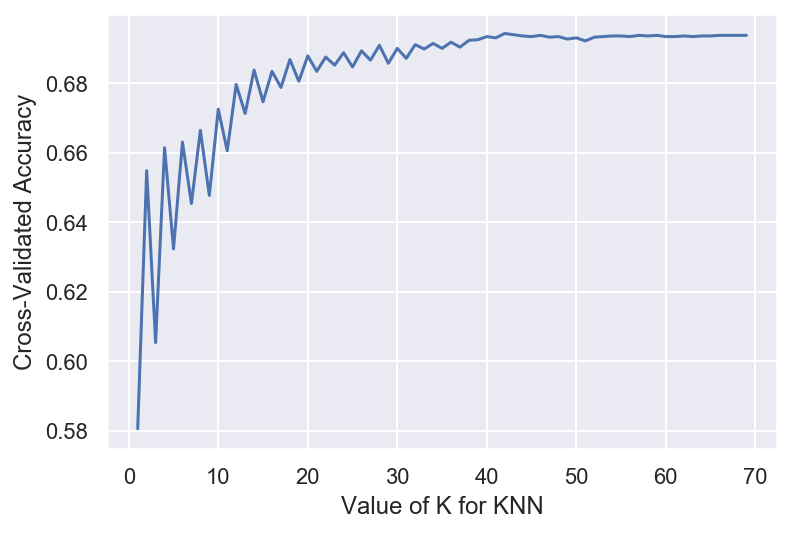

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

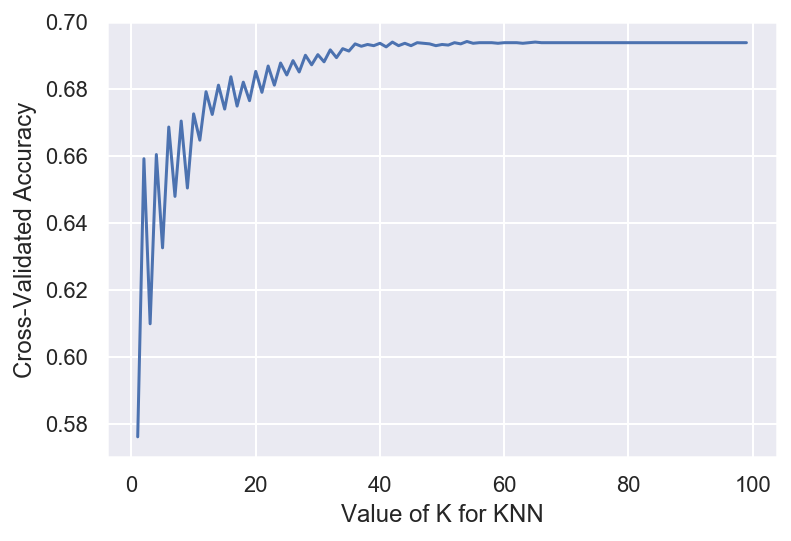

In [17]:
# Another cool viz 
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv = 5)
    k_scores.append(scores.mean())
#print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Any guesses on why accuracy drops drastically at these 'neighbor intervals'?

### KNN Cross Validation with best K from previous step

In [18]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=40)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.6933909228026875


### Using the cross_validate method to get training scores

In [28]:
knn = KNeighborsClassifier(n_neighbors=40)

In [29]:
cv_results = cross_validate(knn, X_train, y_train, cv = 10, return_train_score=True)

In [33]:
print(cv_results['train_score'])
print(cv_results['test_score'])

[0.69438381 0.69339155 0.69418535 0.69418535 0.6939869  0.69390994
 0.69430669 0.69410831 0.69470343 0.69371157]
[0.6969697  0.6969697  0.6916221  0.69340463 0.69340463 0.69230769
 0.69588551 0.69051878 0.69051878 0.69230769]


### GridSearch

In [37]:
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

In [38]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [39]:
# fit the grid with data
grid.fit(X_train, y_train);

In [40]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.03666651, 0.03504279, 0.03507268, 0.0367862 , 0.03556459,
        0.03584402, 0.03489857, 0.03535657, 0.03432922, 0.03484943,
        0.03472557, 0.03495619, 0.034337  , 0.03568306, 0.03499978,
        0.03650515, 0.035972  , 0.03668437, 0.03418217, 0.03692982,
        0.03707638, 0.03674476, 0.03607845, 0.03526959, 0.03535612,
        0.03578727, 0.03623605, 0.03784497, 0.03654797, 0.03567836,
        0.0358402 , 0.03567426, 0.03419113, 0.03609059, 0.03721886,
        0.03644576, 0.03555813, 0.03520601, 0.03414216, 0.03484654,
        0.0351311 , 0.03616762, 0.03479171, 0.03540881, 0.03639505,
        0.03624976, 0.03432188, 0.03585129, 0.0354434 , 0.03674927,
        0.03666654, 0.03756521, 0.03506308, 0.03561411, 0.03635771,
        0.03652143, 0.03571703, 0.0359678 , 0.0357955 , 0.03560786,
        0.03747182, 0.03625572, 0.03695483, 0.03502078, 0.03636723,
        0.03622999, 0.03658931, 0.03712621, 0.03601329, 0.03667727,
        0.03693755, 0.03671112,

In [41]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6942857142857143
{'n_neighbors': 42}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=2,
                     weights='uniform')


### Searching multiple parameters simultaneously

In [42]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

In [43]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [44]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=40, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
# view the complete results
grid.cv_results_

{'mean_fit_time': array([0.03812075, 0.03769917, 0.03745613, 0.03695691, 0.0374845 ,
        0.03601649, 0.03604267, 0.03670709, 0.03740273, 0.03742268,
        0.03728542, 0.0363739 , 0.0363569 , 0.03638489, 0.03614073,
        0.03701184, 0.03547044, 0.03750341, 0.03864758, 0.03771322,
        0.0371448 , 0.03805842, 0.03849845, 0.03775272, 0.03750062,
        0.03772283, 0.03675745, 0.03733084, 0.03700008, 0.03701355,
        0.03749864, 0.03765495, 0.0370585 , 0.0361186 , 0.03631694,
        0.03605387, 0.03709691, 0.03765395, 0.03646302, 0.03577054,
        0.03721724, 0.03632827, 0.03603511, 0.03608296, 0.03675876,
        0.03644803, 0.03713505, 0.03620143, 0.03730989, 0.03672798,
        0.03672016, 0.03664768, 0.03648398, 0.03698478, 0.03693187,
        0.03764336, 0.0388737 , 0.03698416, 0.03674369, 0.03647947]),
 'std_fit_time': array([0.00158649, 0.00161684, 0.0005314 , 0.00070557, 0.00050767,
        0.00120107, 0.00113571, 0.0010398 , 0.00141702, 0.00166991,
        0.000

In [46]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6908928571428572
{'n_neighbors': 28, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')


### Randomized CV Search

In [49]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=13)
rand.fit(X_train, y_train)
rand.cv_results_

# examine the best model
print(rand.best_score_)
print(rand.best_params_)

# run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
best_scores = []
for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X_train, y_train)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

0.6857142857142857
{'weights': 'uniform', 'n_neighbors': 29}
[0.688, 0.69, 0.689, 0.688, 0.685, 0.687, 0.689, 0.69, 0.686, 0.689, 0.685, 0.69, 0.688, 0.688, 0.689, 0.691, 0.687, 0.687, 0.687, 0.69]


## Logistic Regression

In [25]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter = 100) 
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())

/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: Convergence

0.6928599899872129


/Users/farsyd/anaconda3/envs/metis/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Tune C

## Support Vector Machine - Linear

## SVM - Radial

## Decision Tree Classifier

## Random Forest Classifier

## Naive Bayes

## XG Boost